## Performance

Ce notebook est dédié au calcul de la performance de chacun des joueurs des 5 ligues.

Alexandre Ly, Paul Paquin, Petit Charlène, Naziz Ismail

## Imports

In [21]:
import pandas as pd
import numpy as np 
import string
import operator

## Base de données

In [22]:
data_17_18 = pd.read_csv('table_final_17-18.csv', sep=",", engine="python",encoding = 'UTF-8')
data_18_19 = pd.read_csv('table_final_18-19.csv', sep=",", engine="python",encoding = 'UTF-8') 

## Statistiques

In [23]:
def description(data_foot):
    # write your code here:
    num_des=data_foot.describe()
    cate_des=data_foot.describe(include=['object'])
    return num_des,cate_des


## Initilisation dictionnaire des valeurs  

In [24]:
# dictionnaire de valeurs pour chaque poste
global dic
dic = {}
dic['FW'] = {}
dic['AMC'] = {}
dic['AMR'] = {}
dic['AML'] = {}
dic['AMLR'] = {}
dic['MFC'] = {}
dic['MFR'] = {}
dic['MFL'] = {}
dic['MFLR'] = {}
dic['DMC'] = {}
dic['DC'] = {}
dic['DR'] = {}
dic['DL'] = {}
dic['DLR'] = {}
dic['MLR'] = {}


In [25]:
# coefficent FW
#commun 40% de l'info
dic['FW']['Yel'] = 0
dic['FW']['Red'] = 0.012
dic['FW']['MotM'] = 0.08
dic['FW']['PS%'] = 0.04
dic['FW']['Fouls'] = 0
dic['FW']['Goals'] = 0.12
dic['FW']['Assists'] = 0.08
dic['FW']['AerialsWon'] = 0.04
dic['FW']['Lost Balls'] = 0.008
dic['FW']['Bad Controls'] = 0.02

#particulier 60% de l'info

#attack
dic['FW']['Fouled'] = 0.018
dic['FW']['Dribble by'] = 0.042
dic['FW']['Offside'] = 0.048
dic['FW']['Lost Balls'] = 0.012
dic['FW']['SpG'] = 0.048

#tir
dic['FW']['OutOfBox'] = 0.018
dic['FW']['SixYardBox'] = 0.012
dic['FW']['PenaltyArea'] = 0.036
dic['FW']['OpenPlay'] = 0.072
dic['FW']['Counter'] = 0.012
dic['FW']['SetPiece'] = 0.012
dic['FW']['PenaltyTaken'] = 0.018
dic['FW']['Total_shots'] = 0.048
dic['FW']['OffTarget'] = 0.06
dic['FW']['OnPost'] = 0.006
dic['FW']['OnTarget'] = 0.09
dic['FW']['Blocked'] = 0.006

#passes
dic['FW']['Average Passes'] = 0.006
dic['FW']['Long Balls'] = 0.006
dic['FW']['Through Balls'] = 0.012
dic['FW']['Crosses'] = 0.006

#defense
dic['FW']['Tackles'] = 0
dic['FW']['Interceptions'] = 0.006
dic['FW']['Clearances'] = 0
dic['FW']['Dribbled past'] = 0
dic['FW']['Own Goals'] = 0.006
dic['FW']['Offsides Won'] = 0

In [26]:
# coefficent FW
#commun 40% de l'info
dic['AMC']['Yel'] = 0
dic['AMC']['Red'] = 0.012
dic['AMC']['MotM'] = 0.08
dic['AMC']['PS%'] = 0.06
dic['AMC']['Fouls'] = 0
dic['AMC']['Goals'] = 0.092
dic['AMC']['Assists'] = 0.088
dic['AMC']['AerialsWon'] = 0.008
dic['AMC']['Lost Balls'] = 0.02
dic['AMC']['Bad Controls'] = 0.04

#particulier 60% de l'info

#attack
dic['AMC']['Fouled'] = 0.03
dic['AMC']['Dribble by'] = 0.06
dic['AMC']['Offside'] = 0.012
dic['AMC']['Lost Balls'] = 0.03
dic['AMC']['SpG'] = 0.03

#tir
dic['AMC']['OutOfBox'] = 0.03
dic['AMC']['SixYardBox'] = 0.006
dic['AMC']['PenaltyArea'] = 0.036
dic['AMC']['OpenPlay'] = 0.06
dic['AMC']['Counter'] = 0.006
dic['AMC']['SetPiece'] = 0.012
dic['AMC']['PenaltyTaken'] = 0
dic['AMC']['Total_shots'] = 0.03
dic['AMC']['OffTarget'] = 0.03
dic['AMC']['OnPost'] = 0
dic['AMC']['OnTarget'] = 0.048
dic['AMC']['Blocked'] = 0

#passes
dic['AMC']['Average Passes'] = 0.06
dic['AMC']['Long Balls'] = 0.006
dic['AMC']['Through Balls'] = 0.09
dic['AMC']['Crosses'] = 0.006

#defense
dic['AMC']['Tackles'] = 0
dic['AMC']['Interceptions'] = 0.012
dic['AMC']['Clearances'] = 0
dic['AMC']['Dribbled past'] = 0
dic['AMC']['Own Goals'] = 0.006
dic['AMC']['Offsides Won'] = 0

In [27]:
dic['AMR']['Yel'] = 0
dic['AMR']['Red'] = 0.012
dic['AMR']['MotM'] = 0.06
dic['AMR']['PS%'] = 0.06
dic['AMR']['Fouls'] = 0.008
dic['AMR']['Goals'] = 0.088
dic['AMR']['Assists'] = 0.1
dic['AMR']['AerialsWon'] = 0
dic['AMR']['Lost Balls'] = 0.032
dic['AMR']['Bad Controls'] = 0.04

#particulier 60% de l'info

#attack
dic['AMR']['Fouled'] = 0.03
dic['AMR']['Dribble by'] = 0.06
dic['AMR']['Offside'] = 0.06
dic['AMR']['Lost Balls'] = 0.03
dic['AMR']['SpG'] = 0.03

#tir
dic['AMR']['OutOfBox'] = 0.042
dic['AMR']['SixYardBox'] = 0
dic['AMR']['PenaltyArea'] = 0.03
dic['AMR']['OpenPlay'] = 0.018
dic['AMR']['Counter'] = 0.03
dic['AMR']['SetPiece'] = 0.006
dic['AMR']['PenaltyTaken'] = 0
dic['AMR']['Total_shots'] = 0.03
dic['AMR']['OffTarget'] = 0.018
dic['AMR']['OnPost'] = 0
dic['AMR']['OnTarget'] = 0.042
dic['AMR']['Blocked'] = 0

#passes
dic['AMR']['Average Passes'] = 0.048
dic['AMR']['Long Balls'] = 0.006
dic['AMR']['Through Balls'] = 0.042
dic['AMR']['Crosses'] = 0.06

#defense
dic['AMR']['Tackles'] = 0
dic['AMR']['Interceptions'] = 0.012
dic['AMR']['Clearances'] = 0
dic['AMR']['Dribbled past'] = 0
dic['AMR']['Own Goals'] = 0.006
dic['AMR']['Offsides Won'] = 0

# hypothèse de symétrie 
dic['AML'] = dic['AMR']   
dic['AMLR'] =  dic['AML']

In [28]:
# coefficent FW
#commun 40% de l'info
dic['MFC']['Yel'] = 0.02
dic['MFC']['Red'] = 0.04
dic['MFC']['MotM'] = 0.032
dic['MFC']['PS%'] = 0.088
dic['MFC']['Fouls'] = 0.02
dic['MFC']['Goals'] = 0.04
dic['MFC']['Assists'] = 0.072
dic['MFC']['AerialsWon'] = 0.02
dic['MFC']['Lost Balls'] = 0.036
dic['MFC']['Bad Controls'] = 0.032

#particulier 60% de l'info

#attack
dic['MFC']['Fouled'] = 0.006
dic['MFC']['Dribble by'] = 0.024
dic['MFC']['Offside'] = 0.006
dic['MFC']['Lost Balls'] = 0.036
dic['MFC']['SpG'] = 0.018

#tir
dic['MFC']['OutOfBox'] = 0.042
dic['MFC']['SixYardBox'] = 0
dic['MFC']['PenaltyArea'] = 0.018
dic['MFC']['OpenPlay'] = 0.03
dic['MFC']['Counter'] = 0.018
dic['MFC']['SetPiece'] = 0.006
dic['MFC']['PenaltyTaken'] = 0
dic['MFC']['Total_shots'] = 0.018
dic['MFC']['OffTarget'] = 0.012
dic['MFC']['OnPost'] = 0
dic['MFC']['OnTarget'] = 0.036
dic['MFC']['Blocked'] = 0

#passes
dic['MFC']['Average Passes'] = 0.09
dic['MFC']['Long Balls'] = 0.042
dic['MFC']['Through Balls'] = 0.06
dic['MFC']['Crosses'] = 0.03

#defense
dic['MFC']['Tackles'] = 0.03
dic['MFC']['Interceptions'] = 0.06
dic['MFC']['Clearances'] = 0
dic['MFC']['Dribbled past'] = 0.012
dic['MFC']['Own Goals'] = 0.006
dic['MFC']['Offsides Won'] = 0

In [29]:
# coefficent MFL
#commun 40% de l'info
dic['MFL']['Yel'] = 2*4/1000
dic['MFL']['Red'] = 10*4/1000
dic['MFL']['MotM'] = 12*4/1000
dic['MFL']['PS%'] = 9*4/1000
dic['MFL']['Fouls'] = 2*4/1000
dic['MFL']['Goals'] = 15*4/1000
dic['MFL']['Assists'] = 15*4/1000
dic['MFL']['AerialsWon'] = 5*4/1000
dic['MFL']['Lost Balls'] = 15*4/1000
dic['MFL']['Bad Controls'] = 15*4/1000

#particulier 60% de l'info

#attack
dic['MFL']['Fouled'] = 9*6/1000
dic['MFL']['Dribble by'] = 9*6/1000
dic['MFL']['Offside'] = 3*6/1000
dic['MFL']['Lost Balls'] = 7*6/1000
dic['MFL']['SpG'] = 5*6/1000

#tir
dic['MFL']['OutOfBox'] = 3*6/1000
dic['MFL']['SixYardBox'] = 3*6/1000
dic['MFL']['PenaltyArea'] = 3*6/1000
dic['MFL']['OpenPlay'] = 3*6/1000
dic['MFL']['Counter'] = 3*6/1000
dic['MFL']['SetPiece'] = 3*6/1000
dic['MFL']['PenaltyTaken'] = 3*6/1000
dic['MFL']['Total_shots'] = 5*6/1000
dic['MFL']['OffTarget'] = 3*6/1000
dic['MFL']['OnPost'] = 1*6/1000
dic['MFL']['OnTarget'] = 3*6/1000
dic['MFL']['Blocked'] = 3*6/1000

#passes
dic['MFL']['Average Passes'] = 9.5*6/1000
dic['MFL']['Long Balls'] = 4*6/1000
dic['MFL']['Through Balls'] = 4*6/1000
dic['MFL']['Crosses'] = 7*6/1000

#defense
dic['MFL']['Tackles'] = 1*6/1000
dic['MFL']['Interceptions'] = 3*6/1000
dic['MFL']['Clearances'] = 0.5*6/1000
dic['MFL']['Dribbled past'] = 1*6/1000
dic['MFL']['Own Goals'] = 1*6/1000
dic['MFL']['Offsides Won'] = 0

#symértie
dic['MFR'] = dic['MFL']
dic['MFLR'] = dic['MFL']
dic['MLR'] = dic['MFL']

In [30]:
# coefficent DMC
#commun 40% de l'info
dic['DMC']['Yel'] = 10*4/1000
dic['DMC']['Red'] = 10*4/1000
dic['DMC']['MotM'] = 5*4/1000
dic['DMC']['PS%'] = 15*4/1000
dic['DMC']['Fouls'] = 10*4/1000
dic['DMC']['Goals'] = 3*4/1000
dic['DMC']['Assists'] = 7*4/1000
dic['DMC']['AerialsWon'] = 10*4/1000
dic['DMC']['Lost Balls'] = 15*4/1000
dic['DMC']['Bad Controls'] = 15*4/1000

#particulier 60% de l'info

#attack
dic['DMC']['Fouled'] = 2*6/1000
dic['DMC']['Dribble by'] = 3*6/1000
dic['DMC']['Offside'] = 1*6/1000
dic['DMC']['Lost Balls'] = 11*6/1000
dic['DMC']['SpG'] = 0.5*6/1000

#tir
dic['DMC']['OutOfBox'] = 1*6/1000
dic['DMC']['SixYardBox'] = 1*6/1000
dic['DMC']['PenaltyArea'] = 1*6/1000
dic['DMC']['OpenPlay'] = 1*6/1000
dic['DMC']['Counter'] = 0.5*6/1000
dic['DMC']['SetPiece'] = 1*6/1000
dic['DMC']['PenaltyTaken'] = 0.5*6/1000
dic['DMC']['Total_shots'] = 1*6/1000
dic['DMC']['OffTarget'] = 0.5*6/1000
dic['DMC']['OnPost'] = 0.5*6/1000
dic['DMC']['OnTarget'] = 0.5*6/1000
dic['DMC']['Blocked'] = 0.5*6/1000

#passes
dic['DMC']['Average Passes'] = 11*6/1000
dic['DMC']['Long Balls'] = 8*6/1000
dic['DMC']['Through Balls'] = 8*6/1000
dic['DMC']['Crosses'] = 1*6/1000

#defense
dic['DMC']['Tackles'] = 9*6/1000
dic['DMC']['Interceptions'] = 15*6/1000
dic['DMC']['Clearances'] = 6*6/1000
dic['DMC']['Dribbled past'] = 10*6/1000
dic['DMC']['Own Goals'] = 5*6/1000
dic['DMC']['Offsides Won'] = 0.5*6/1000

In [31]:
# coefficent DC
#commun 40% de l'info
dic['DC']['Yel'] = 10*4/1000
dic['DC']['Red'] = 10*4/1000
dic['DC']['MotM'] = 5*4/1000
dic['DC']['PS%'] = 14*4/1000
dic['DC']['Fouls'] = 19*4/1000
dic['DC']['Goals'] = 1*4/1000
dic['DC']['Assists'] = 1*4/1000
dic['DC']['AerialsWon'] = 20*4/1000
dic['DC']['Lost Balls'] = 15*4/1000
dic['DC']['Bad Controls'] = 5*4/1000

#particulier 60% de l'info

#attack
dic['DC']['Fouled'] = 1*6/1000
dic['DC']['Dribble by'] = 0
dic['DC']['Offside'] = 0
dic['DC']['Lost Balls'] = 10*6/1000
dic['DC']['SpG'] = 0

#tir
dic['DC']['OutOfBox'] = 0
dic['DC']['SixYardBox'] = 0
dic['DC']['PenaltyArea'] = 0
dic['DC']['OpenPlay'] = 0 
dic['DC']['Counter'] = 0
dic['DC']['SetPiece'] = 1*6/1000
dic['DC']['PenaltyTaken'] = 0.5*6/1000
dic['DC']['Total_shots'] = 1*6/1000
dic['DC']['OffTarget'] = 0
dic['DC']['OnPost'] = 0
dic['DC']['OnTarget'] = 0
dic['DC']['Blocked'] = 0

#passes
dic['DC']['Average Passes'] = 9*6/1000
dic['DC']['Long Balls'] = 7*6/1000
dic['DC']['Through Balls'] = 7*6/1000
dic['DC']['Crosses'] = 0

#defense
dic['DC']['Tackles'] = 12*6/1000
dic['DC']['Interceptions'] = 12*6/1000
dic['DC']['Clearances'] = 14.5*6/1000
dic['DC']['Dribbled past'] = 10*6/1000
dic['DC']['Own Goals'] = 5*6/1000
dic['DC']['Offsides Won'] = 10*6/1000


In [32]:
# coefficent DL
#commun 40% de l'info
dic['DL']['Yel'] = 10*4/1000
dic['DL']['Red'] = 10*4/1000
dic['DL']['MotM'] = 5*4/1000
dic['DL']['PS%'] = 12*4/1000
dic['DL']['Fouls'] = 12*4/1000
dic['DL']['Goals'] = 3*4/1000
dic['DL']['Assists'] = 8*4/1000
dic['DL']['AerialsWon'] = 10*4/1000
dic['DL']['Lost Balls'] = 15*4/1000
dic['DL']['Bad Controls'] = 15*4/1000

#particulier 60% de l'info

#attack
dic['DL']['Fouled'] = 4*6/1000
dic['DL']['Dribble by'] = 2*6/1000
dic['DL']['Offside'] = 2*6/1000
dic['DL']['Lost Balls'] = 10*6/1000
dic['DL']['SpG'] = 0.5*6/1000

#tir
dic['DL']['OutOfBox'] = 0.5*6/1000
dic['DL']['SixYardBox'] = 0
dic['DL']['PenaltyArea'] = 0
dic['DL']['OpenPlay'] = 0.5*6/1000
dic['DL']['Counter'] = 0
dic['DL']['SetPiece'] = 1*6/1000
dic['DL']['PenaltyTaken'] = 0.5*6/1000
dic['DL']['Total_shots'] = 1*6/1000
dic['DL']['OffTarget'] = 0
dic['DL']['OnPost'] = 0
dic['DL']['OnTarget'] = 0
dic['DL']['Blocked'] = 0

#passes
dic['DL']['Average Passes'] = 9*6/1000
dic['DL']['Long Balls'] = 6*6/1000
dic['DL']['Through Balls'] = 6*6/1000
dic['DL']['Crosses'] = 7*6/1000

#defense
dic['DL']['Tackles'] = 9*6/1000
dic['DL']['Interceptions'] = 11*6/1000
dic['DL']['Clearances'] = 9*6/1000
dic['DL']['Dribbled past'] = 9*6/1000
dic['DL']['Own Goals'] = 4*6/1000
dic['DL']['Offsides Won'] = 8*6/1000

#par symétrie
dic['DR'] = dic['DL']
dic['DLR'] = dic['DL']

In [33]:
clés = dic.keys()
algebraic_values = ['Yel','Red','Fouls','Bad Controls','Offside','OffTarget','Blocked','Own Goals','OnPost','Lost Balls']
for clé in clés:
    for element in algebraic_values:
        dic[clé][element] = -dic[clé][element]
# valeurs comptés négativement

In [34]:
def performance(joueur,stats): # prends en argument un joueur et ses statistiques / renvoie la performance d'un joueur
    position1 = joueur['Position 1'] 
    position2 = joueur['Position 2'] 
    perf1 = 0
    perf2 = 0
    perf = 0
    #si ce n'est pas un joueur vide 
    if str(position1) != str(0):
    
        # effectue le produit scalaire entre les variables centrées et réduites et les coeffs du dictionnaire
        for attribut in dic[position1]:

            mean = stats[attribut]["mean"]
            std = stats[attribut]["std"]
            coefficient = dic[position1][attribut]
            score1 = joueur[attribut]-mean
            score2 = joueur[attribut]-std
            perf1 += coefficient*(score1 + 0.15* score2)

        # condition en fonction de la variété des positions d'un joueur
        if position2 == position1:
            perf = perf1

        elif position1[0] == position2[0]:  
            for attribut in dic[position2]:
                mean = stats[attribut]["mean"]
                std = stats[attribut]["std"]
                coefficient = dic[position2][attribut]
                score1 = joueur[attribut]-mean
                score2 = joueur[attribut]-std
                perf2 += coefficient*(score1 + 0.15* score2)
            perf = perf1 + 0.06*perf2
        else:
            for attribut in dic[position2]:
                mean = stats[attribut]["mean"]
                std = stats[attribut]["std"]
                coefficient = dic[position2][attribut]
                score1 = joueur[attribut]-mean
                score2 = joueur[attribut]-std
                perf2 += coefficient*(score1 + 0.15* score2)
            perf = perf1 + 0.1*perf2



    
    return perf

In [35]:
def add_performance_to_table(data): # fonction qui rajoute la performance à la table
    nb_lines = data.shape[0]
    stats = description(data)[0]
    for i in range(nb_lines):
        joueur = data.iloc[i]
        perf = performance(joueur,stats)
        data["Performance"] = perf
    return data

In [36]:
def table_performance(data): # fonction qui calcule la performance pour chacun des joueurs
    nb_lines = data.shape[0]
    dico_perf = {}
    dico_perf['Name'] = []
    dico_perf['Performance'] = []
    stats = description(data)[0]
    
    for i in range(nb_lines):
        joueur = data.iloc[i]
        perf = performance(joueur,stats)
        dico_perf['Name'].append(data.iloc[i]['Name'])
        dico_perf['Performance'].append(perf)

    
    mini = min(dico_perf['Performance'])
    
    for i in range(nb_lines):
        dico_perf["Performance"][i] = dico_perf["Performance"][i] -mini 
        
    maxi = max(dico_perf['Performance'])  
    
    for i in range(nb_lines):
        dico_perf["Performance"][i] = (dico_perf["Performance"][i]*100)/maxi

    df = pd.DataFrame.from_dict(dico_perf)
    
    return df


In [37]:
res_17_18 = table_performance(data_17_18)
res_18_19 = table_performance(data_18_19)

In [38]:
res_17_18

,Name,Performance
0,Philippe Coutinho,57.468929
1,Sergio Agüero,58.586149
2,Alex Oxlade Chamberlain,42.609996
3,Kevin De Bruyne,65.465650
4,Henri Saivet,35.432990
5,Mohamed Salah,73.221788
6,Eden Hazard,40.935923
7,Harry Kane,77.982648
8,David Silva,49.614162
9,Alexis Sánchez,38.010741


In [39]:
import matplotlib.pyplot as plt
def plot_box(data_foot):
    plt.figure(figsize = (10, 10))
    data_foot.boxplot(column='Performance')


In [40]:
description(res_17_18)[0]

,Performance
count,2398.000000
mean,26.471052
std,11.252419
min,0.000000
25%,18.858507
50%,25.132227
75%,32.809713
max,100.000000


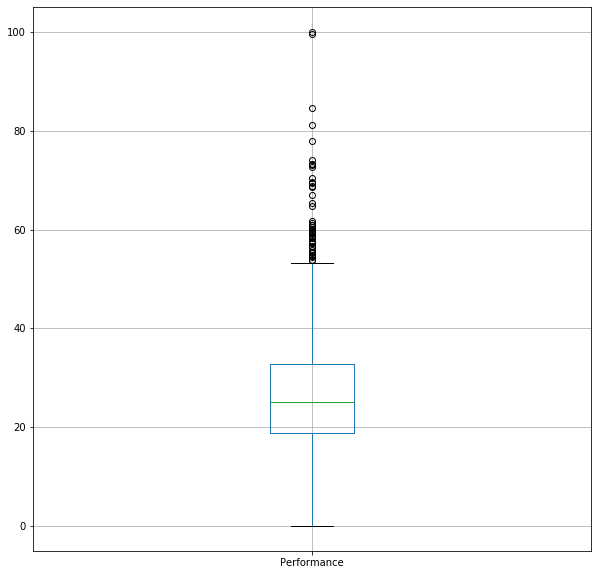

In [41]:
plot_box(res_17_18)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016ED3C78400>]],
      dtype=object)

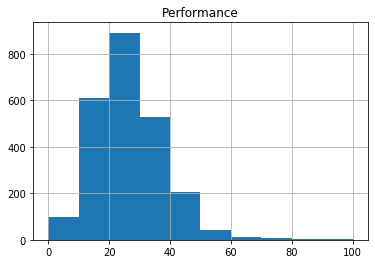

In [42]:
# histogram
res_17_18.hist()

In [43]:
res_17_18.to_csv(r'C:\Users\ASUS\Desktop\données_foot\perfomance_17_18.csv',sep = ',' , index = None, header=True)
res_18_19.to_csv(r'C:\Users\ASUS\Desktop\données_foot\perfomance_18_19.csv',sep = ',' , index = None, header=True)